In [11]:
import matplotlib.pyplot as plt
import numpy as np


458

In [15]:

def batch_gradient_descent(X, y, learning_rate=0.01, epochs=1000, verbose_interval=100):
    """
    X: Input features (matrix of shape n_samples, n_features)
    y: Target values (vector of shape n_samples)
    verbose_interval: How often to print updates
    """
    n_samples, n_features = X.shape
    # 1. Initialize parameters (weights) to zeros
    theta = np.random.randn(n_features)
    
    cost_history = []
    theta_history = []  # Store theta values for visualization

    for i in range(epochs):
        # 2. Calculate Predictions (h_theta)
        predictions = np.dot(X, theta)
        
        # 3. Calculate Error
        errors = predictions - y
        
        # 4. Calculate Gradient (The average gradient across the whole batch)
        # This is the vectorized version of the summation formula
        gradient = (1/n_samples) * np.dot(X.T, errors)
        
        # 5. Update Parameters
        theta = theta - learning_rate * gradient
        
        # Optional: Track the cost to ensure it's decreasing
        cost = (1/(2*n_samples)) * np.sum(errors**2)
        cost_history.append(cost)
        theta_history.append(theta.copy())
        
        # Print updates
        if i % verbose_interval == 0:
            print(f"Epoch {i:4d} | Cost: {cost:.4f} | θ₀: {theta[0]:.4f}, θ₁: {theta[1]:.4f}")

    return theta, cost_history, theta_history

Epoch    0 | Cost: 55.2054 | θ₀: 1.0570, θ₁: 2.4814
Epoch    5 | Cost: 8.1186 | θ₀: 3.9691, θ₁: 5.0453
Epoch   10 | Cost: 3.0983 | θ₀: 5.1049, θ₁: 5.6578
Epoch   15 | Cost: 2.2977 | θ₀: 5.6640, θ₁: 5.6723
Epoch   20 | Cost: 1.9624 | θ₀: 6.0251, θ₁: 5.5133
Epoch   25 | Cost: 1.7134 | θ₀: 6.3087, θ₁: 5.3132
Epoch   30 | Cost: 1.5069 | θ₀: 6.5540, θ₁: 5.1124
Epoch   35 | Cost: 1.3333 | θ₀: 6.7745, θ₁: 4.9228
Epoch   40 | Cost: 1.1870 | θ₀: 6.9753, θ₁: 4.7470
Epoch   45 | Cost: 1.0637 | θ₀: 7.1593, θ₁: 4.5851
Epoch   50 | Cost: 0.9598 | θ₀: 7.3280, θ₁: 4.4363
Epoch   55 | Cost: 0.8722 | θ₀: 7.4828, θ₁: 4.2996
Epoch   60 | Cost: 0.7985 | θ₀: 7.6249, θ₁: 4.1742
Epoch   65 | Cost: 0.7363 | θ₀: 7.7553, θ₁: 4.0590
Epoch   70 | Cost: 0.6839 | θ₀: 7.8751, θ₁: 3.9533
Epoch   75 | Cost: 0.6398 | θ₀: 7.9850, θ₁: 3.8562
Epoch   80 | Cost: 0.6026 | θ₀: 8.0859, θ₁: 3.7672
Epoch   85 | Cost: 0.5712 | θ₀: 8.1785, θ₁: 3.6854
Epoch   90 | Cost: 0.5448 | θ₀: 8.2635, θ₁: 3.6103
Epoch   95 | Cost: 0.5225 | θ₀

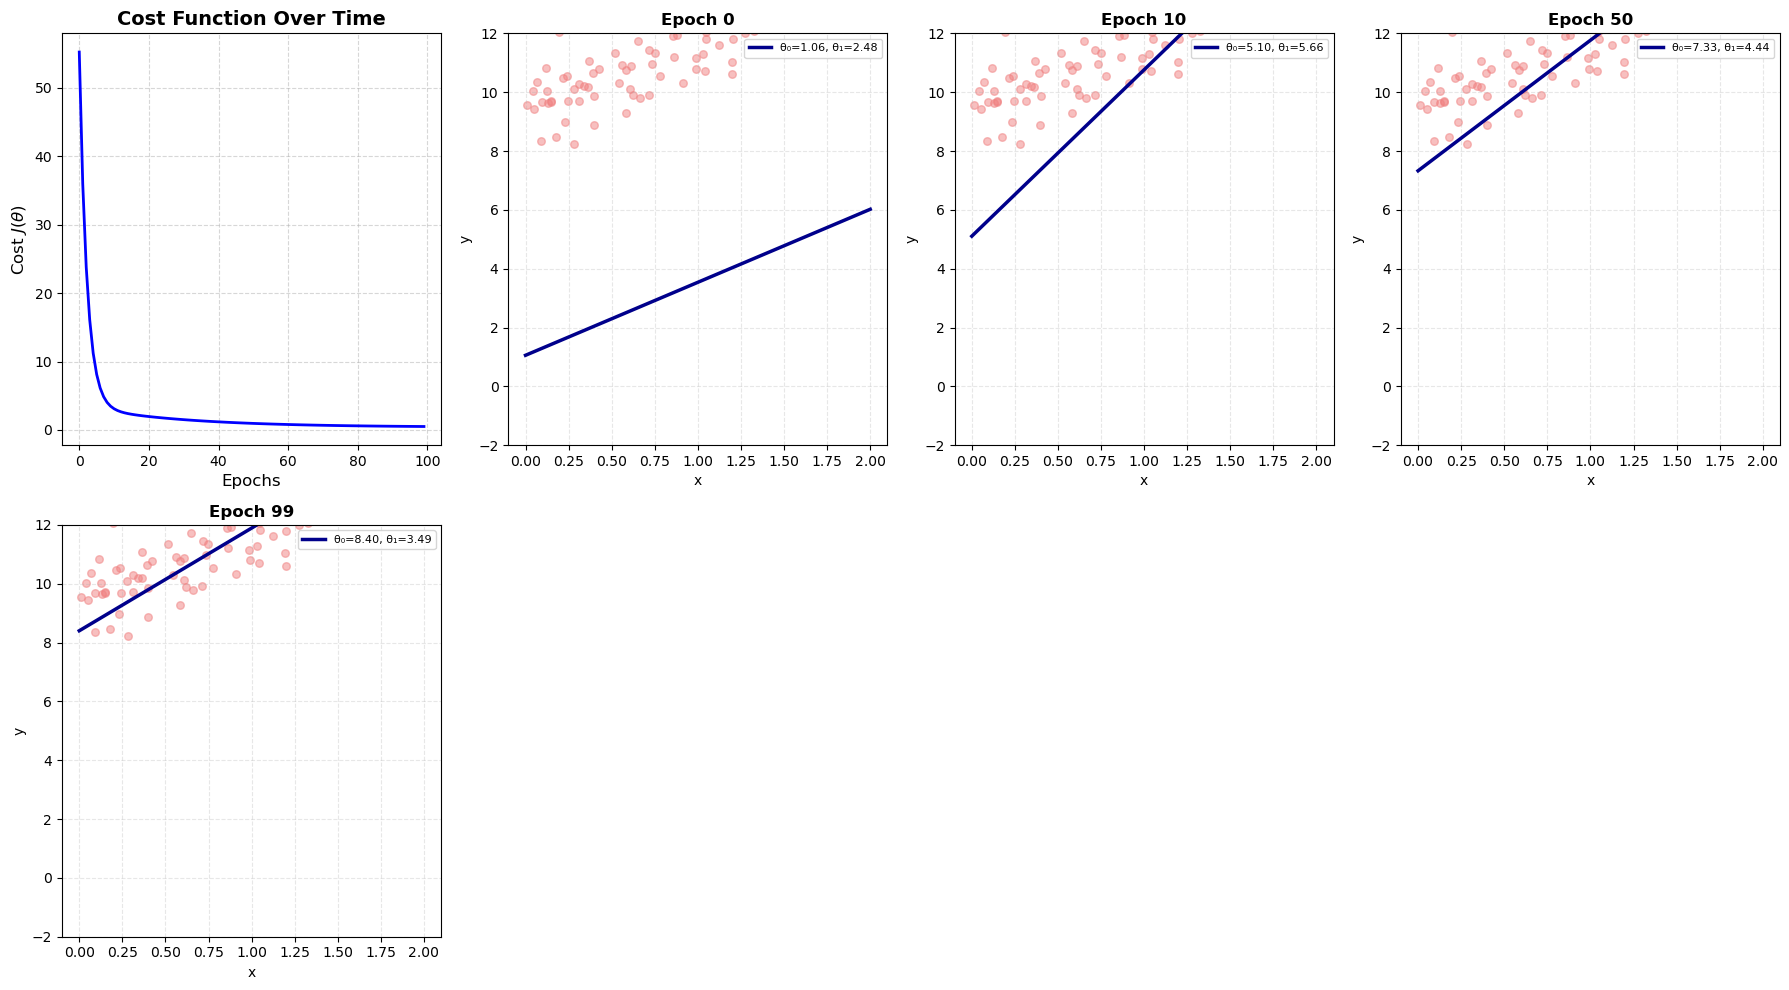


FINAL RESULTS:
Learned Parameters: θ₀ = 8.3994, θ₁ = 3.4903
Final Cost: 0.5073
True Parameters: θ₀ ≈ 4.00, θ₁ ≈ 3.00


In [22]:
np.random.seed(42)
X_raw = 2 * np.random.rand(100, 1) # Feature
y = 9 + 3 * X_raw.flatten() + np.random.randn(100) # Target (4 + 3x + noise)

# Add bias term (column of 1s) to the data matrix
X_b = np.c_[np.ones((100, 1)), X_raw]

# --- Run the Algorithm ---
theta, cost_history, theta_history = batch_gradient_descent(X_b, y, learning_rate=0.1, epochs=100,verbose_interval=5)

# --- Plotting: Show Evolution of Gradient Descent ---
fig = plt.figure(figsize=(18, 10))

# Select specific epochs to show evolution
epochs_to_show = [0, 10, 50,99]

# Plot 1: Cost Function Convergence
ax1 = plt.subplot(2, 4, 1)
ax1.plot(range(len(cost_history)), cost_history, color='blue', linewidth=2)
ax1.set_title('Cost Function Over Time', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Cost $J(\\theta)$', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)

# Plot 2-8: Evolution of Fit Line at Different Epochs
x_line = np.array([0, 2])
for idx, epoch in enumerate(epochs_to_show):
    ax = plt.subplot(2, 4, idx + 2)
    
    # Get theta at this epoch
    theta_at_epoch = theta_history[epoch]
    y_line = theta_at_epoch[0] + theta_at_epoch[1] * x_line
    
    # Plot data and fit line
    ax.scatter(X_raw, y, color='lightcoral', alpha=0.5, s=30)
    ax.plot(x_line, y_line, color='darkblue', linewidth=2.5, 
            label=f'θ₀={theta_at_epoch[0]:.2f}, θ₁={theta_at_epoch[1]:.2f}')
    ax.set_title(f'Epoch {epoch}', fontsize=12, fontweight='bold')
    ax.set_xlabel('x', fontsize=10)
    ax.set_ylabel('y', fontsize=10)
    ax.legend(fontsize=8)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.set_xlim(-0.1, 2.1)
    ax.set_ylim(-2, 12)

plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print(f"FINAL RESULTS:")
print(f"{'='*60}")
print(f"Learned Parameters: θ₀ = {theta[0]:.4f}, θ₁ = {theta[1]:.4f}")
print(f"Final Cost: {cost_history[-1]:.4f}")
print(f"True Parameters: θ₀ ≈ 4.00, θ₁ ≈ 3.00")
print(f"{'='*60}")

In [23]:
theta_at_epoch

array([8.39937883, 3.49034744])